# The Rehub Loss


You are required to investigate a regularized update for SGD with the following regularization function:
$\phi(\mathbf{w}) = \sum_{j=1}^d h(w_j)$, where $h$ is a scalar function, $h: \mathbb{R} \to \mathbb{R}_+$ defined as,
$$
h(z) =
  \begin{cases}
    |z|      &  |z| \geq 1 \\
    a z^2  + c & \text{o.w.}
  \end{cases} ~ ,
$$
with $a,c\in\mathbb{R}_+$.

The core of the regularization, the function $h(z)$, must be continous. Its derivative, $h'(z)$, should be continous everywhere. We use SGD to approximately find the minimum of,
$\mathcal{L}(\mathbf{w}) + \lambda \phi(\mathbf{w})$. The empirical loss $\mathcal{L}(\mathbf{w})$ is a convex function. It was constructed such that $\mathcal{L}(\mathbf{0})=1$ and $\mathcal{L}(\mathbf{w}) \geq 0$.

1. Determine the values of $a$ and $c$. Using matplotlib, plot $h(z)$ and $h'(z)$ for $z\in[-3,3]$.


2. Let $\mathbf{w}^\star$ denote the optimal solution of the regularized problem,
   $\mathbf{w}^\star = \arg\min_{\mathbf{w}} \mathcal{L}(\mathbf{w}) + \lambda \phi(\mathbf{w})$. Use
   the value of the regularized loss at the optimum and the initial value at $\mathbf{0}$ to bound
   $\|\mathbf{w}^\star\|$ when $\lambda\geq2$.


3. Given your answer to (2), would $\phi(\mathbf{w})$ promote sparse or diverse solutions when
   $\lambda \geq 2$? Explain in 2-4 lines.


4. Derive a SGD update with $\phi(\mathbf{w})$ as the regularization function and $\lambda=3$. You can use
   the variables $\mathbf{w}_t$, $\mathbf{w}_{t+1}$, $\mathbf{g}_t$, and $\eta_t$ as used in class.

## Answer 1

Condition 1: $h(z)$ must be continuous. 

Condition 2: $h'(z)$ must be continuous everywhere.


To satisfy both C1 and C2, find values of a and c that satisfy continuity at the joining of the two parts (i.e. at $z = \pm 1$) 

From C1, $a(\pm1)^2 + c = |\pm1|$ 

$$ a + c = 1$$

$\frac{d}{dz}(az^2 + c) = 2az$

From C2, $2a(\pm1) = \frac{\pm1}{|z|}$

$$2a = 1$$

$a = c = \frac{1}{2}$


<IPython.core.display.Javascript object>


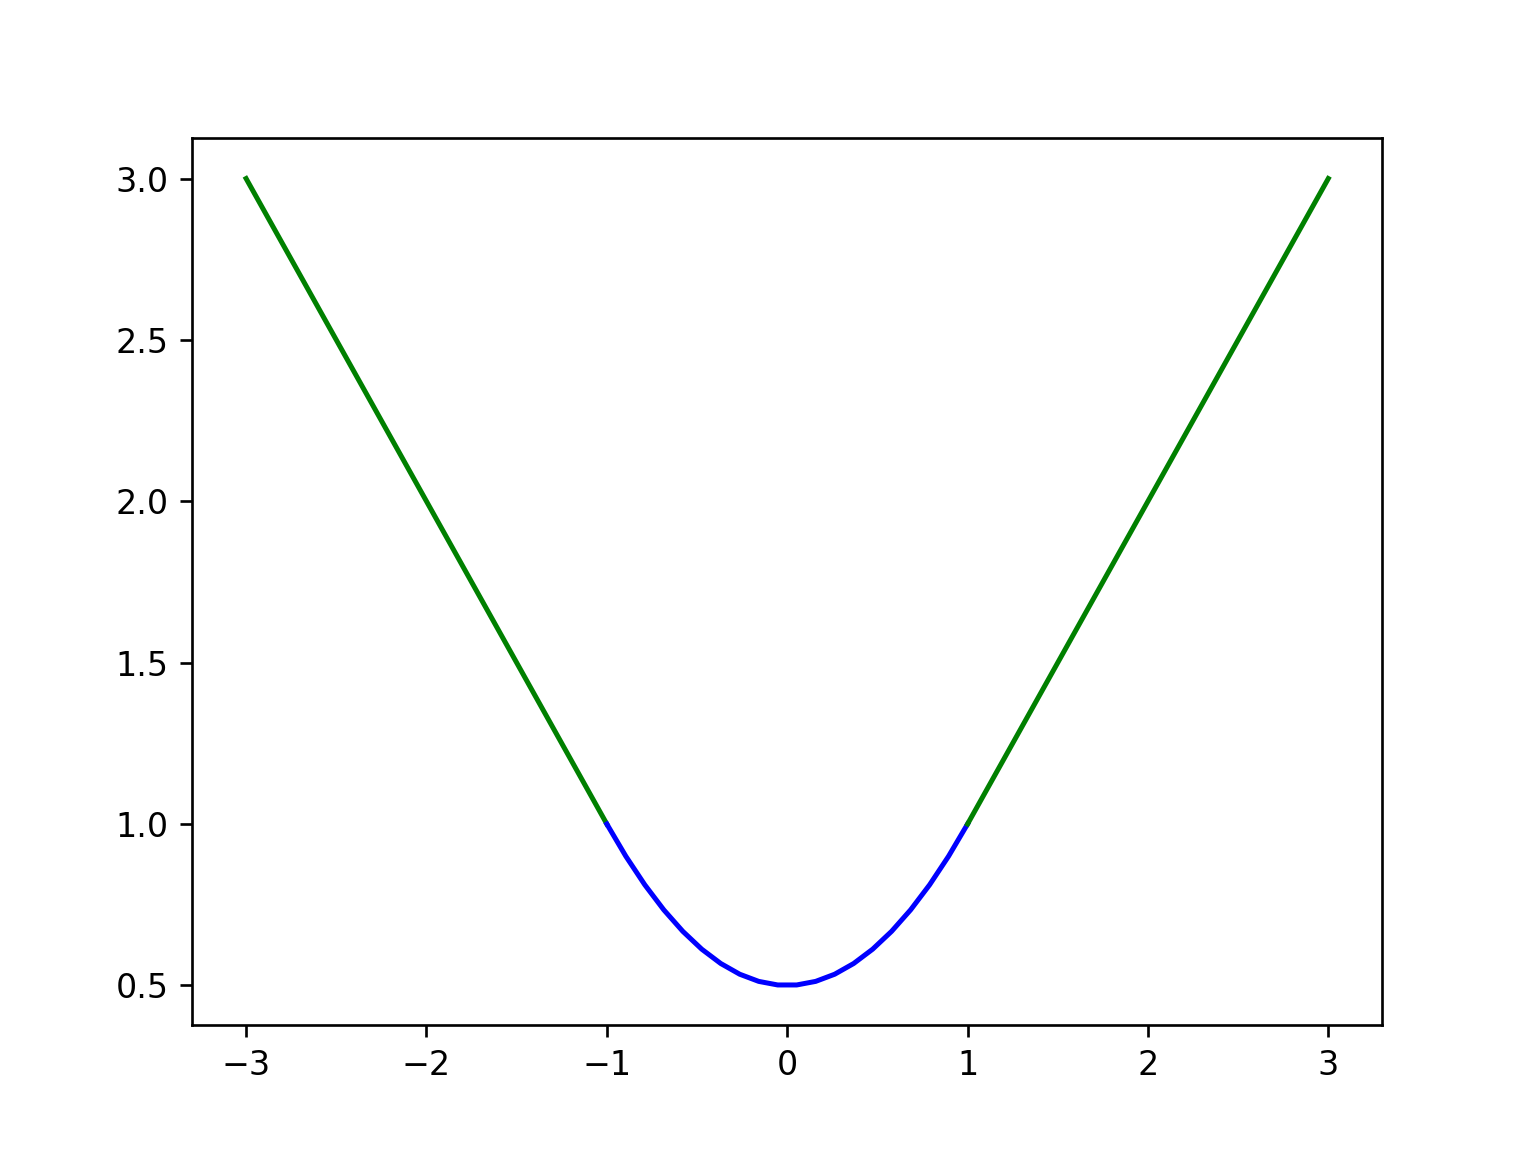

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# 100 linearly spaced numbers
x1 = np.linspace(-3,-1,20)
y1 = abs(x1)

x2 = np.linspace(-1,1,20)
y2 = 0.5*x2**2 + (0.5)

x3 = np.linspace(1,3,20)
y3 = abs(x3)

# setting the axes at the centre
fig = plt.figure()

# plot the function
plt.plot(x1,y1, 'g')
plt.plot(x2,y2, 'b')
plt.plot(x3,y3, 'g')


## Answer 2

$\mathbf{w}^\star = \arg\min_{\mathbf{w}} \mathcal{L}(\mathbf{w}) + \lambda \phi(\mathbf{w})$

Upper bound (largest error can be): $w = \mathbf{0}$ then $\mathcal{L}(\mathbf{0}) = 1$ and $\phi(\mathbf{0}) = \sum_{j=1}^d h(w_j) = \frac{d}{2}$ since $h(0) = \frac{1}{2}$

$$1 + \lambda \frac{d}{2} = \mathcal{L}(\mathbf{0}) + \lambda \phi(\mathbf{0}) $$

The optimal value must be lower than the value at 0:

$$ \mathcal{L}(\mathbf{0}) + \lambda \phi(\mathbf{0}) \geq \mathcal{L}(\mathbf{w^\star}) + \lambda \phi(\mathbf{w^\star})  $$

The loss is non-zero:

$$ \mathcal{L}(\mathbf{w^\star}) + \lambda \phi(\mathbf{w^\star}) \geq \lambda \phi(\mathbf{w^\star})$$

The $\phi$ function will produce a value greater than the 1-norm (taxicab norm, sum of absolute value of $w_j$) since the function between -1 and 1 is quadratic and greater than the absolute value of $w_j$ in this region.

$$ \lambda \phi(\mathbf{w^\star}) \geq \lambda ||\mathbf{w^\star}||_1$$

Therefore putting the upper and lower bound together:

$$ 1 + \lambda \frac{d}{2} \geq \lambda ||\mathbf{w^\star}||_1$$

$$ ||\mathbf{w^\star}||_1 \leq \frac{1}{\lambda} + \frac{d}{2} $$

This expression based on the 1-norm results in a d-dimensional polyhedral bounding space. For example if $w \in \mathbb{R}^2$ the result would be a square with vertices at $\pm (\frac{1}{\lambda} + \frac{d}{2}, 0)$ and $\pm (0, \frac{1}{\lambda} + \frac{d}{2})$. If $w \in \mathbb{R}^3$ the resulting bounding volume would be an octahedron, and so forth in higher dimensions. 

Assume that the $||\mathbf{w^\star}||_1$ is a subset of the $||\mathbf{w^\star}||_2$ bounding space. Then the solution to the problem is the sphere that encompasses the polyhedron (i.e. touches all the corners). Since the corners are defined by as $\pm (\frac{1}{\lambda} + \frac{d}{2})$ in each dimension, the radius of the hyper sphere encompassing the polyhedron is also this value:

$$ r = \frac{1}{\lambda} + \frac{d}{2} = ||\mathbf{w^\star}||_2 $$ 

Not sure, but another option is that the $||\mathbf{w^\star}||_2$ is a subset of the $||\mathbf{w^\star}||_1$ bounding space. In that case the inscribed hyper sphere (that fits inside the polyhderon) would be the solution. This would result in a sphere of radius:

$$ r = \frac{1}{\sqrt{d}} \left( \frac{1}{\lambda} + \frac{d}{2} \right) = ||\mathbf{w^\star}||_2 $$ 


## Answer 3

A sparse solution refers to a solution for w that contains many 0's. In the regularized sparse solution, you ensure that each component of the vector that is non-zero is important to the solution. So instead of just memorizing all the training data and hard-coding all the w-values to it (over-fitting), you force the algorithm to just learn identifying features in the data set (which is what you need to correctly classify the unseen test data).

The L1 norm will produce a sparse solution since the solution space is defined as a polyhedron with vertices along each axis that "stick out" like spikes. Only the dimension that a vertex lies on will have values, the rest of the terms will be 0, hence these vertices represent sparse solutions (i.e. see the 2d and 3d examples discussed above). Growing this space until it reaches the solution, it is most likely that one of these "spikes" will contact the solution first = a sparse solution is found. It is possible to have diverse solutions as well, if for example the solution is aligned with one of the polyhedral faces, but most likely a sparse one will be found.

Since the L2 norm is defined as a sphere (i.e. it is a smooth surface), there is no specific set of points that is more likely to contact the solution, as was the case with L1. Every point on the surface of the sphere is equally likely to contact the solution as the sphere is grown outwards. Therefore both sparse and diverse solutions are possible, and by probability it is more likely that a diverse solution will be found.

## Answer 4

No time to finish this sadly...